# A Word Cloud

A word cloud is a snapshot of text.

### Install the Word Cloud Library

In a Google Colab notebook we use the next script.

In [1]:
!pip install wordcloud

In a terminal we use 

```pip install wordcloud``` 
or
```conda install -c conda-forge wordcloud```


### Import the Text Material

For this example, we will use content from a Wikipedia page, which you can download as raw text in a few lines of code without the inherent markup.

In [15]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''
  params = {
      'action': 'query',
      'format': 'json', # request json formatted content
      'titles': 'title', #title of the wikipedia page
      'prop': 'extracts',
      'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
      'https://en.wikipedia.org/w/api.php',  
      params= params
  ).json()

  #Parse the result
  page = next(iter(response['query']['pages'].values()))
  # return the page content
  if 'extract' in page.keys():
    return page['extract']
  else:
    return "Page not found"

# we lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('Earth').lower()
print(text)

a title is one or more words used before or after a person's name, in certain contexts. it may signify either generation, an official position, or a professional or academic qualification. in some languages, titles may be inserted between the first and last name (for example, gomi in german, cardinal in catholic usage (richard cardinal cushing) or clerical titles such as archbishop). some titles are hereditary.


== types ==
titles include:

honorific titles or styles of address, a phrase used to convey respect to the recipient of a communication, or to recognize an attribute such as:
imperial, royal and noble ranks
academic degree
social titles, prevalent among certain sections of society due to historic or other reasons.
other accomplishment, as with a title of honor
title of authority, an identifier that specifies the office or position held by an official


== titles in english-speaking areas ==
the following titles are the default titles:

mr. – adult man (regardless of marital st

## Create the Word Cloud

In [16]:
# import the wordcloud library
from wordcloud import WordCloud
#Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
                      normalize_plurals = False,
                      width = 600, height=300,
                      max_words = 300,
                      stopwords = []
                       )
# Apply the wordcloud to the text.
wordcloud.generate(text)

Use ```matplotlib``` to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

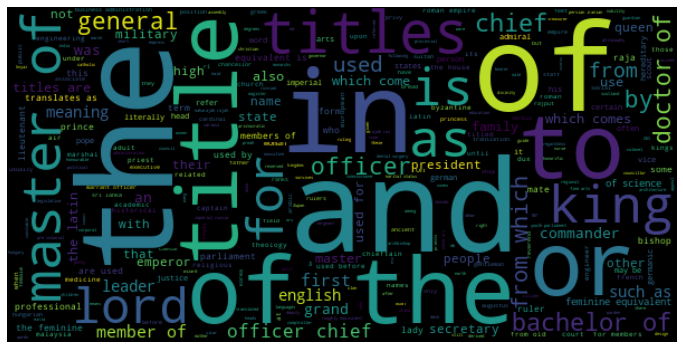

In [17]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (12,9))
#add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
#and remove the axis
plt.axis("off")